# Observations


## Analysis
<ul>
   <li> As suspected, temperatures are higher the closer the city is in latitude to the equator.</li>
   <li> There doesn't seem to be a strong correlation between latitude and humidity. </li>
   <li> Cloudiness seems to be consistent as cities are equidistant from the equator. For instance cities that have latitude 20 have the same cloudiness level as cities that have latitude -20.  </li>
</ul>

In [ ]:
#Import Dependencies 
from citipy import citipy
import openweathermapy as ow

import random
import requests as req

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

In [113]:
#Set zones to choose from any latitude and longitude range 
latitude_range = np.arange(-90,90,15)
longitude_range = np.arange(-200,200,15)


#City data frame to hold random lat/lon coordinates 
cities_df = pd.DataFrame()

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""

# at random, pick coordinate from each range and add to the sample
for x in latitude_range:
    for y in longitude_range:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        all_lat = random.sample(x_values,50)
        all_lon = random.sample(y_values,50)
        sample_lat = [(x+dec_lat) for dec_lat in all_lat]
        sample_lon = [y+dec_lon for dec_lon in all_lon]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":sample_lat,
                                       "Longitude":sample_lon}))
cities_df = cities_df.reset_index(drop=True)


In [114]:
cities_df["City"] = ""
cities_df["Country"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"City", city.city_name)
    cities_df.set_value(index,"Country", city.country_code)

#Only want city and countries 
new_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
new_cities_df

# Drop any duplicates so no city shows up twice 
new_cities_df = new_cities_df.drop_duplicates()

In [115]:
#Get random 500 cities 
random_cities = new_cities_df.sample(500)

random_cities = random_cities.reset_index(drop=True)

In [116]:
#API call 
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
base_url = "http://api.openweathermap.org/data/2.5/weather"

app_id = api_key

params = { "appid" :app_id,"units":"imperial" }

In [117]:
#For loop to retrieve weather data 
for column, row in random_cities.iterrows():
    
    # Reference rows for 'q' param
    params["q"] = f'{row["City"]}, {row["Country"]}'
    
    # Get and print links for each city
    print(f'Printing weather information for {params["q"]}')
    weather_response = req.get(base_url, params)
    print(weather_response.url)
    weather_response  = weather_response.json()
    
    # Get weather data and input into dataframe
    random_cities.set_value(column, "Latitude", weather_response.get("coord", {}).get("lat"))
    random_cities.set_value(column, "Longitude", weather_response.get("coord", {}).get("lon"))
    random_cities.set_value(column, "Temperature", weather_response.get("main", {}).get("temp_max"))
    random_cities.set_value(column, "Wind Speed", weather_response.get("wind", {}).get("speed"))
    random_cities.set_value(column, "Humidity", weather_response.get("main", {}).get("humidity"))
    random_cities.set_value(column, "Cloudiness", weather_response.get("clouds", {}).get("all"))

Printing weather information for cabra, ph
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cabra%2C+ph
Printing weather information for sheboygan, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sheboygan%2C+us
Printing weather information for darnah, ly
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=darnah%2C+ly
Printing weather information for marsa matruh, eg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marsa+matruh%2C+eg
Printing weather information for ocos, gt
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ocos%2C+gt
Printing weather information for filingue, ne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=filingue%2C+ne
Printing weather informa

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dalbandin%2C+pk
Printing weather information for kimparana, ml
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kimparana%2C+ml
Printing weather information for southbridge, nz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=southbridge%2C+nz
Printing weather information for kargasok, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kargasok%2C+ru
Printing weather information for bargal, so
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bargal%2C+so
Printing weather information for nizhneyansk, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nizhneyansk%2C+ru
Printing weather information for cidreira, br
http:

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=aliaga%2C+tr
Printing weather information for boulsa, bf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=boulsa%2C+bf
Printing weather information for shasta lake, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=shasta+lake%2C+us
Printing weather information for kadykchan, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kadykchan%2C+ru
Printing weather information for jiehu, cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=jiehu%2C+cn
Printing weather information for kitgum, ug
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kitgum%2C+ug
Printing weather information for iquique, cl
http://api.openweathermap

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=viedma%2C+ar
Printing weather information for ukiah, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ukiah%2C+us
Printing weather information for broken hill, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=broken+hill%2C+au
Printing weather information for tucupita, ve
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tucupita%2C+ve
Printing weather information for umm kaddadah, sd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=umm+kaddadah%2C+sd
Printing weather information for texarkana, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=texarkana%2C+us
Printing weather information for hobyo, so
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tiksi%2C+ru
Printing weather information for marion, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marion%2C+us
Printing weather information for melilla, es
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=melilla%2C+es
Printing weather information for yuncheng, cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yuncheng%2C+cn
Printing weather information for santa isabel do rio negro, br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=santa+isabel+do+rio+negro%2C+br
Printing weather information for taolanaro, mg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=taolanaro%2C+mg
Printing weather information for kh

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-paul%2C+re
Printing weather information for guatire, ve
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=guatire%2C+ve
Printing weather information for karasjok, no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=karasjok%2C+no
Printing weather information for lisala, cd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lisala%2C+cd
Printing weather information for mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mahebourg%2C+mu
Printing weather information for skjervoy, no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=skjervoy%2C+no
Printing weather information for umea, se
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sisimiut%2C+gl
Printing weather information for urumqi, cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=urumqi%2C+cn
Printing weather information for volksrust, za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=volksrust%2C+za
Printing weather information for ouadda, cf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ouadda%2C+cf
Printing weather information for teyateyaneng, ls
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=teyateyaneng%2C+ls
Printing weather information for inirida, co
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=inirida%2C+co
Printing weather information for lagoa, pt
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=puerto+carreno%2C+co
Printing weather information for saint-leu, re
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-leu%2C+re
Printing weather information for hlotse, ls
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hlotse%2C+ls
Printing weather information for upington, za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=upington%2C+za
Printing weather information for victoria point, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=victoria+point%2C+au
Printing weather information for yei, sd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yei%2C+sd
Printing weather information for guarapari, br
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fare%2C+pf
Printing weather information for vardo, no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vardo%2C+no
Printing weather information for north platte, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=north+platte%2C+us
Printing weather information for ivdel, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ivdel%2C+ru
Printing weather information for san carlos, py
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san+carlos%2C+py
Printing weather information for santiago del estero, ar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=santiago+del+estero%2C+ar
Printing weather information for xinpu, cn
h

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=albertville%2C+us
Printing weather information for nantucket, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nantucket%2C+us
Printing weather information for fallon, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fallon%2C+us
Printing weather information for naantali, fi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=naantali%2C+fi
Printing weather information for ust-kulom, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ust-kulom%2C+ru
Printing weather information for san cristobal, ec
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san+cristobal%2C+ec
Printing weather information for changtu, cn
http

In [119]:
random_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
City           500 non-null object
Country        500 non-null object
Latitude       416 non-null float64
Longitude      416 non-null float64
Temperature    416 non-null float64
Wind Speed     416 non-null float64
Humidity       416 non-null float64
Cloudiness     416 non-null float64
dtypes: float64(6), object(2)
memory usage: 31.3+ KB


## Temperature vs. Latitude

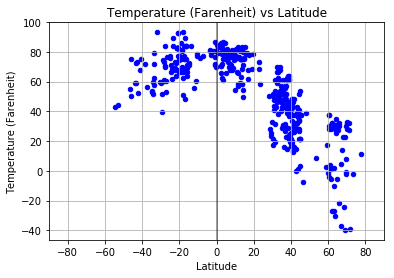

In [123]:
def plot_points(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)
random_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")
#Show scatter plot for temp vs. latitude
plot_points("Latitude",[-90,90],"Temperature (Farenheit)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Latitude")
plt.show()

## Humidity vs. Latitude

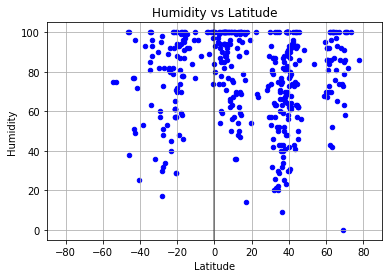

In [124]:
#Show scatter plot for humidity vs. latitude 
random_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")
plot_points("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity vs Latitude")
plt.show()

## Cloudiness vs. Latitude

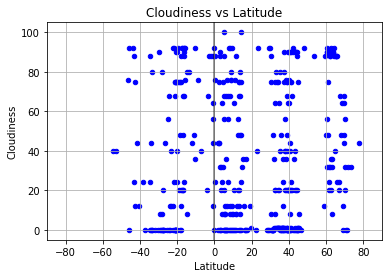

In [125]:
random_cities["Cloudiness"] = pd.to_numeric(random_cities["Cloudiness"])
random_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")
plot_points("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness vs Latitude")
plt.show()

## Wind Speed vs. Latitude

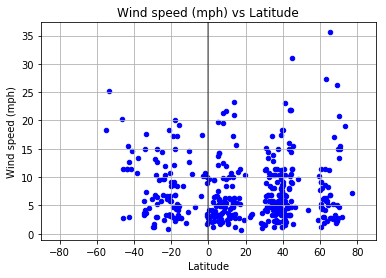

In [131]:
random_cities["Wind Speed"] = pd.to_numeric(random_cities["Wind Speed"])
random_cities.plot(kind="scatter",x="Latitude",y="Wind Speed",grid=True,color="blue")

plot_points("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind speed vs Latitude")
plt.show()